In [14]:
import pandas as pd
data=pd.read_csv('/home/arya/ml/tennis/PlayTennis.csv')
old_column_name = 'Play Tennis'
new_column_name = 'PlayTennis'
data.rename(columns={old_column_name: new_column_name}, inplace=True)
data.to_csv('/home/arya/ml/tennis/PlayTennis.csv', index=False)
print(data)

     Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [15]:
from sklearn.preprocessing import LabelEncoder #ml model cannot understand strings, so label encoder

In [16]:
Outlook=LabelEncoder()
Temperature=LabelEncoder() 
Humidity=LabelEncoder() 
Wind=LabelEncoder() 
PlayTennis=LabelEncoder()

In [18]:
data['Outlook']=Outlook.fit_transform(data['Outlook'])
data['Humidity']=Outlook.fit_transform(data['Humidity'])
data['Temperature']=Outlook.fit_transform(data['Temperature'])
data['Wind']=Outlook.fit_transform(data['Wind'])
data['PlayTennis']=Outlook.fit_transform(data['PlayTennis'])
print(data)

    Outlook  Temperature  Humidity  Wind  PlayTennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y=data.PlayTennis
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)#data split into 80 20 ratio
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)
classifier.predict(X_test)

array([1, 1, 1, 1, 1])

In [33]:
X_test

,Outlook,Temperature,Humidity,Wind
2,0,1,0,1
12,0,1,1,1
9,1,2,1,1
8,2,0,1,1
13,1,2,0,0


In [34]:
classifier.score(X_test,y_test)

0.8

[Text(0.5, 0.9, 'x[0] <= 1.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.7, 'x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.7, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

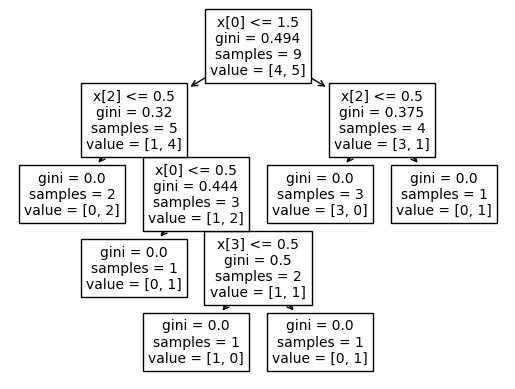

In [35]:
from sklearn import tree
tree.plot_tree(classifier)